In [1]:
import pandas as pd
import os
import sys

sys.path.append(os.path.join(os.getcwd(), 'sentence-transformers'))
from sentence_transformers import SentenceTransformer

In [2]:
df = pd.read_parquet('/home/toomuch/kaggle-diffusion/metadata.parquet')
df = df[df['image_name'].isin(set(os.listdir(os.path.join(os.getcwd(), "test-images"))))]
df = df[df['height'] == df['width']]
df = df[df['height'] == 512]


In [3]:
df

,image_name,prompt,part_id,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw
0,2217ccbd-a1c6-47ac-9a2d-79649727c834.png,"a portrait of a female robot made from code, v...",1,2615452544,50,7.0,8,512,512,0167cc490c3dc6047be855b096a9b9d8f20e2b034532bd...,2022-08-20 11:56:00+00:00,0.554853,0.001621
1,c78807b7-d55a-4a2d-a6b6-9192b18941ad.png,a portrait of a female robot made from a cloud...,1,4231506957,50,7.0,8,512,512,0167cc490c3dc6047be855b096a9b9d8f20e2b034532bd...,2022-08-20 11:59:00+00:00,0.153645,0.000707
2,dc71658a-5e4b-4dca-861a-e1535510348b.png,"only memories remain, trending on artstation",1,544607824,50,7.0,8,512,512,0167cc490c3dc6047be855b096a9b9d8f20e2b034532bd...,2022-08-20 12:02:00+00:00,0.062496,0.000425
3,48eb7e17-a3cf-4eb8-96a9-d8e3e23fa1af.png,dream swimming pool with nobody,1,3500509234,50,7.0,8,512,512,019084defdd44d2dfcd200bf7aaae53034263168e10d6b...,2022-08-20 07:22:00+00:00,0.030799,0.003586
7,2919b048-6f68-4ac7-a6d5-060d827abb77.png,a beautiful paint of cultists dancing surround...,1,3411375323,50,7.0,8,512,512,03eb87276e83cad77782d2679dbf707f0148b9669960ca...,2022-08-20 10:12:00+00:00,0.031513,0.001875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31979,95afda38-18a6-4ed0-8c9f-15a820c8275e.png,"a fire station, train!!!!!!!!!! train!!!!!!!!!...",32,1936252596,50,7.0,8,512,512,fb632fee88dc8a7c582043a7b363a7d64e67d274e6e001...,2022-08-11 12:00:00+00:00,0.049591,0.008662
31980,96a10a24-c278-4994-a5f9-11732945a824.png,katniss everdeen wearing jedi robes,32,1816283834,50,7.0,8,512,512,fb632fee88dc8a7c582043a7b363a7d64e67d274e6e001...,2022-08-11 13:24:00+00:00,0.363699,0.006918
31981,66209ec4-f7a9-46d4-8ee8-f8d7aee29273.png,( ( ( ( ( katniss everdeen ) ) ) ) ) wearing t...,32,4014529544,50,7.0,8,512,512,fb632fee88dc8a7c582043a7b363a7d64e67d274e6e001...,2022-08-11 13:39:00+00:00,0.083404,0.014965
31997,0dc9676a-9478-4e73-8298-2fd5b6ee4877.png,"a spider kangaroo hybrid, stephen bliss, unrea...",32,3764519121,50,7.0,8,512,512,ff7088468ca8a208ef56e7aa106f9e3a08c527a9e8f3a6...,2022-08-11 10:07:00+00:00,0.122757,0.000466


In [4]:
from PIL import Image
import hashlib
import os
from tqdm import tqdm


hashes = dict()
for path, prompt in tqdm(df[['image_name', 'prompt']].values):
    path = os.path.join(os.getcwd(), 'test-images', path)
    with open(path, 'rb') as image_file:
        image_data = image_file.read()
        image_hash = hashlib.sha256(image_data).hexdigest()
    # text_hash = hashlib.sha256(prompt.encode('utf-8')).hexdigest()
    # combined_hash = hashlib.sha256((image_hash + text_hash).encode('utf-8')).hexdigest()
    combined_hash = image_hash
    hashes[combined_hash[:14]] = {'path': path, 'prompt': prompt}

100%|██████████| 16065/16065 [00:05<00:00, 2858.90it/s]


In [6]:
# len(hashes)
# list(hashes.values())[0]

# import shutil

# # shutil.copyfile(src, dst)

# for key in list(hashes.keys())[:1000]:
#     dst = f'/home/toomuch/kaggle-diffusion/private-cv/test-images-small/{key}.png'
#     shutil.copy(hashes[key]['path'], dst)

In [40]:
device = 'cuda:2'
st_model = SentenceTransformer('./all-MiniLM-L6-v2')
st_model = st_model.to(device)

In [41]:
list(hashes.values())[0]['path'].split('/')[-1]

'2217ccbd-a1c6-47ac-9a2d-79649727c834.png'

In [42]:
dump = []
banned_hashes = []
banned_names = []

for key in tqdm(hashes.keys()):
    prompt = hashes[key]['prompt']
    name = hashes[key]['path'].split('/')[-1]
    emb = st_model.encode(prompt).flatten().tolist()

    banned_hashes.append(key)
    banned_names.append(name)
    dump.append((key, emb))

100%|██████████| 16065/16065 [01:21<00:00, 196.62it/s]


In [43]:
pd.DataFrame(dump, columns=['id', 'emb']).to_parquet('gt_embbedings.parquet', index=False)

In [44]:
pd.read_parquet('gt_embbedings.parquet')

,id,emb
0,b12fb965ab3bef,"[-0.06348676979541779, -0.010778245516121387, ..."
1,53f06d18fa94cf,"[-0.04730300232768059, -0.0005425827112048864,..."
2,cec722eb46d92e,"[0.10905098170042038, -0.06318686157464981, 0...."
3,9cb8dbd6db0890,"[0.042411740869283676, 0.03827928751707077, 0...."
4,d9da485dd71e3a,"[0.00996342021971941, 0.03714865446090698, -0...."
...,...,...
16060,3751d67e493548,"[-0.011630830354988575, 0.07418029010295868, -..."
16061,59f70ef962a98e,"[-0.03635474666953087, 0.08960237354040146, -0..."
16062,18fba8d6ab0495,"[-0.0033376123756170273, 0.11095447838306427, ..."
16063,a230edadebcca4,"[-0.04553332179784775, 0.006017408799380064, -..."


In [45]:
pd.DataFrame(banned_hashes, columns=['img_sha256']).to_csv('banned_hashes.csv', index=False)

In [46]:
pd.DataFrame(banned_names, columns=['img_name']).to_csv('banned_names.csv', index=False)

In [50]:
banned_names_set = set(banned_names)

for path in tqdm(os.listdir('./test-images/')):
    if path in banned_names_set:
        continue
    path = os.path.join('./test-images/', path)
    os.remove(path)

100%|██████████| 16065/16065 [00:00<00:00, 2889429.41it/s]


In [135]:
# Try to get sample submission
import numpy as np

gt_df = pd.read_parquet('gt_embbedings.parquet')
submit_df = []
for img_id, gt_emb in tqdm(gt_df.values):
    shifted_emb = gt_emb + np.random.normal(loc=0.01, scale=0.05, size=len(gt_emb))
    assert len(shifted_emb) == 384
    for i, val in enumerate(shifted_emb):
        submit_df.append((f'{img_id}_{i}', val))

100%|██████████| 16065/16065 [00:02<00:00, 6270.77it/s]


In [136]:
# submit_df[0]
pd.DataFrame(submit_df).to_csv('debug_submit.csv', index=False)

In [137]:
submit_df = pd.DataFrame(submit_df)

In [138]:
# submit_df[submit_df[0].startswith('b12fb965ab3bef_')]

In [139]:
def to_nice_formatting(input_df):
    result = []
    curr_res = []
    curr_id = None
    for img_id, val in tqdm(input_df.values):
        real_id = img_id.split('_')[0]
        if curr_id is None:
            curr_id = real_id
            
        if real_id == curr_id:   
            curr_res.append(val)
        else:
            assert len(curr_res) == 384
            result.append((curr_id, curr_res))
            curr_res = [val]
            curr_id = real_id
    return pd.DataFrame(result, columns=['id', 'emb'])

result = to_nice_formatting(submit_df)

100%|██████████| 6168960/6168960 [00:07<00:00, 829298.52it/s]


In [140]:
len(list(result[result['id'] == '53f06d18fa94cf']['emb'])[0]), len(list(gt_df[gt_df['id'] == '53f06d18fa94cf']['emb'])[0])

(384, 384)

In [141]:
# pd.DataFrame(result).merge(right=gt_df, on=)
tmp = result.merge(right=gt_df, on='id')
tmp

,id,emb_x,emb_y
0,b12fb965ab3bef,"[-0.08956922367093717, 0.012712515717925622, 0...","[-0.06348676979541779, -0.010778245516121387, ..."
1,53f06d18fa94cf,"[-0.010748704606056737, -0.07463073329114217, ...","[-0.04730300232768059, -0.0005425827112048864,..."
2,cec722eb46d92e,"[0.1877375083724269, -0.024900333431983848, -0...","[0.10905098170042038, -0.06318686157464981, 0...."
3,9cb8dbd6db0890,"[0.08708833455113826, 0.08729321543496613, 0.0...","[0.042411740869283676, 0.03827928751707077, 0...."
4,d9da485dd71e3a,"[0.1093471270190086, 0.022742298831412024, 0.0...","[0.00996342021971941, 0.03714865446090698, -0...."
...,...,...,...
16059,3ea74d5d7b16e4,"[0.03741479942932318, 0.039536487713538335, -0...","[-0.014416618272662163, 0.07589352130889893, -..."
16060,3751d67e493548,"[-0.0024018688119854612, 0.031152036202772536,...","[-0.011630830354988575, 0.07418029010295868, -..."
16061,59f70ef962a98e,"[0.09472701226201197, 0.10534446099413822, -0....","[-0.03635474666953087, 0.08960237354040146, -0..."
16062,18fba8d6ab0495,"[-0.05227555164661073, 0.12650311495231953, 0....","[-0.0033376123756170273, 0.11095447838306427, ..."


In [142]:
def cosine_similarity(vec1, vec2):
    vec1, vec2 = np.array(vec1), np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)


def compute_cosine_similarity(row):
    return row['id'], cosine_similarity(row['emb_x'], row['emb_y'])

In [143]:
similarities = tmp.apply(compute_cosine_similarity, axis=1).tolist()

In [144]:
similarities = np.array([el[1] for el in similarities])

In [145]:
similarities.mean()

0.7078015447933117

In [1]:
metrics = pd.Series(similarities).describe().to_dict()#[['mean', '50%']]
metrics

NameError: name 'pd' is not defined

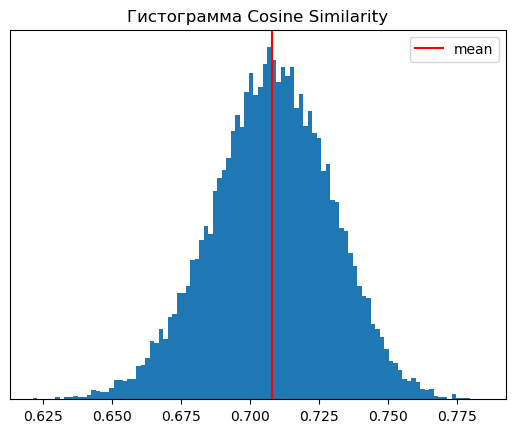

In [164]:
import matplotlib.pyplot as plt


plt.hist(pd.Series(similarities), bins=100)
plt.title('Гистограмма Cosine Similarity')
plt.axvline(x=metrics['mean'], color='red', label='mean')
plt.yticks([])
plt.legend()
plt.show()

In [4]:
import pandas as pd

_a = pd.read_csv('/home/toomuch/kaggle-diffusion/private-cv/debug_submit_scale_1e-2.csv')

In [13]:
_a[:384 * 1000].to_csv('debug.csv', index=False)

In [8]:
_a[:384 * 100]

,0,1
0,b12fb965ab3bef_0,-0.048992
1,b12fb965ab3bef_1,-0.005411
2,b12fb965ab3bef_2,-0.004317
3,b12fb965ab3bef_3,-0.061743
4,b12fb965ab3bef_4,-0.025049
...,...,...
38395,1b2cedcdca5e9e_379,0.017163
38396,1b2cedcdca5e9e_380,0.058287
38397,1b2cedcdca5e9e_381,-0.016192
38398,1b2cedcdca5e9e_382,-0.026466


In [9]:
pd.read_csv('deleteme.csv')

,id,emb_x,emb_y
0,b12fb965ab3bef,"[-0.0489916061723741, -0.0054107753618443, -0....",[-6.34867698e-02 -1.07782455e-02 -1.30121401e-...
1,53f06d18fa94cf,"[-0.0469143087094648, -0.0053577486112479, 0.0...",[-4.73030023e-02 -5.42582711e-04 2.76418366e-...
2,cec722eb46d92e,"[0.0963623119598836, -0.0661832547404126, 0.02...",[ 1.09050982e-01 -6.31868616e-02 1.77967679e-...
3,9cb8dbd6db0890,"[0.0527983408628915, 0.0513511687798972, 0.017...",[ 4.24117409e-02 3.82792875e-02 1.06893880e-...
4,d9da485dd71e3a,"[-0.0160905767520431, 0.0310053086653386, -0.0...",[ 9.96342022e-03 3.71486545e-02 -1.97624601e-...
...,...,...,...
94,07b3385fcf5878,"[-0.0588133799797571, -0.0138765021103244, 0.0...",[-5.34766167e-02 -9.87762306e-03 9.16434899e-...
95,27c9e6afed8e03,"[-0.0064470317468855, -0.0336866665378217, 0.0...",[-2.54300833e-02 -2.96618249e-02 1.95640121e-...
96,36c08e56c9af82,"[-0.1263213329945482, 0.0756202223369513, 0.01...",[-1.08678930e-01 7.21426532e-02 7.73626147e-...
97,44d0131b0d79c5,"[-0.1047111686087831, 0.0634065665375016, 0.01...",[-1.08678930e-01 7.21426532e-02 7.73626147e-...


In [12]:
import csv
import requests
from bs4 import BeautifulSoup

# Replace this with the URL of the Kaggle competition leaderboard
url = 'https://www.kaggle.com/competitions/stable-diffusion-image-to-prompts/leaderboard'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the leaderboard table
    leaderboard_table = soup.find('table', {'class': 'leaderboard__table'})

    # Find all table rows
    table_rows = leaderboard_table.find_all('tr')

    # Extract the header row
    header_row = table_rows.pop(0)

    # Create and open the CSV file
    with open('kaggle_leaderboard.csv', mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)

        # Write the header row
        writer.writerow(['position', 'name', 'score'])

        # Iterate through the table rows
        for row in table_rows:
            # Extract the position, name, and score from each row
            position = row.find('td', {'class': 'leaderboard__ordinal'}).text.strip()
            name = row.find('td', {'class': 'leaderboard__name'}).text.strip()
            score = row.find('td', {'class': 'leaderboard__score'}).text.strip()

            # Write the extracted data to the CSV file
            writer.writerow([position, name, score])

    print('kaggle_leaderboard.csv file created successfully.')
else:
    print(f'Error: Unable to fetch the Kaggle leaderboard. Status code: {response.status_code}')


AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
data = pd.DataFrame([])

# data['floor_name'] = data['floor'].apply(lambda x: 'Первый' if x == 1 else 'Последний')
# (data['floors_total'] == data['floor'])
def agg_func(floor, total_floors):
    return 'Первый' if floor == 1 else 'Последний' if floor == total_floors else 'Другое'


df['floor_name'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)